In [1]:
#import libraries
from glob2 import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#Load the CSV file into a 25 x 2 numpy matrix
file = open("coordinates.csv")
numpy_array = np.loadtxt(file, delimiter=",")
print(numpy_array)

[[ 148.  742.]
 [ 190.  659.]
 [ 232.  575.]
 [ 276.  503.]
 [ 318.  435.]
 [ 362.  376.]
 [ 405.  322.]
 [ 451.  278.]
 [ 496.  241.]
 [ 539.  211.]
 [ 584.  188.]
 [ 632.  174.]
 [ 679.  168.]
 [ 722.  170.]
 [ 767.  180.]
 [ 815.  197.]
 [ 858.  227.]
 [ 904.  260.]
 [ 951.  303.]
 [ 996.  354.]
 [1041.  411.]
 [1087.  477.]
 [1131.  552.]
 [1176.  634.]
 [1219.  722.]]


In [3]:
#Create a sorted list of images
#load the .png image files in the directory, into a list (frames)
frames = [plt.imread(image) for image in sorted(glob('frames/*.png'))]

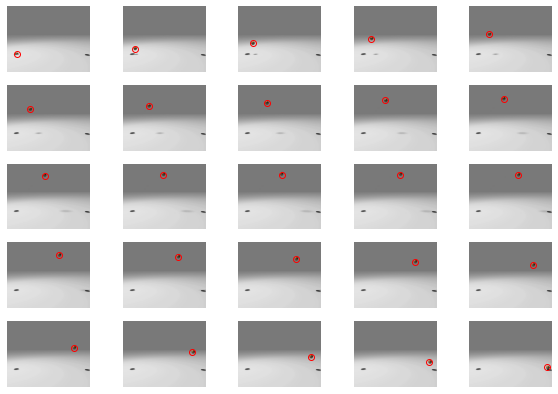

In [4]:
# Load and display each of the 25 frames into a figure with 5 x 5 subplots
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
cols = 5

for i in range(0,rows*cols):    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(frames[i])
    plt.plot(numpy_array[i][0],numpy_array[i][1], 'ro', mfc='none')
    plt.axis('off')

In [5]:
#Fit a parabola y = ax^2 + bx + c to the coordinates using least-squares estimation 
#build the linear system and solve directly for the least-squares estimate of the parameters a,b,c).

def calc_parabola_vertex(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3);
    a     = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom;
    b     = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom;
    c     = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom;
    return a,b,c

In [6]:
#Define the three known points
x1,y1=[148,742] #first point on the
x2,y2=[679,168] #the point in the minimum
x3,y3=[1219,722] #the last point

#Calculate the unknowns of the equation y=ax^2+bx+c
a,b,c=calc_parabola_vertex(x1, y1, x2, y2, x3, y3)

In [7]:
#Define x range for which to calc parabola

x_pos=np.arange(0,1300)
y_pos=[]

#Calculate y values 
for x in range(len(x_pos)):
    x_val=x_pos[x]
    y=(a*(x_val**2))+(b*x_val)+c
    y_pos.append(y)

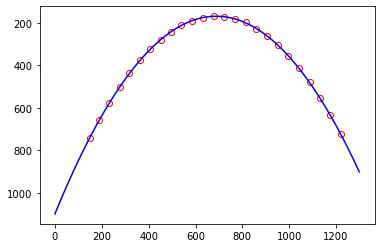

In [8]:
# Plot the parabola
for i in range(0,len(numpy_array)):    
    plt.plot(numpy_array[i][0],numpy_array[i][1], 'ro', mfc='none')
plt.gca().invert_yaxis()
plt.plot(x_pos, y_pos, linestyle='-', color='blue') # parabola line
plt.plot(x_pos, y_pos, color='none') # parabola points
plt.show()

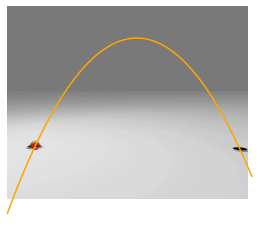

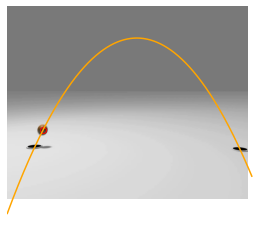

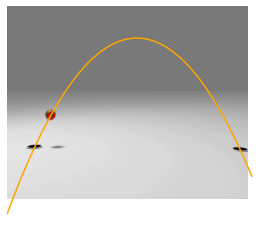

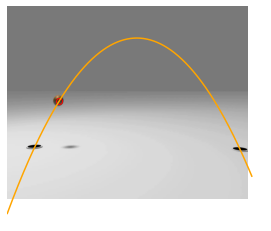

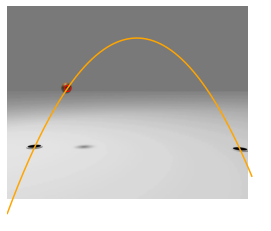

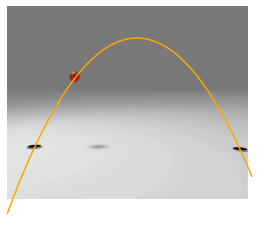

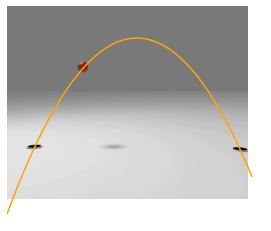

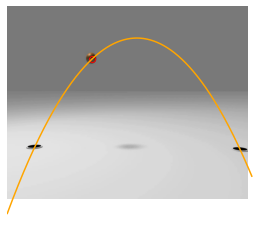

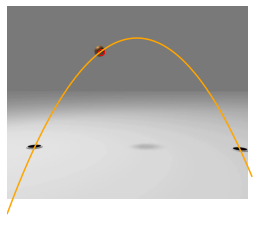

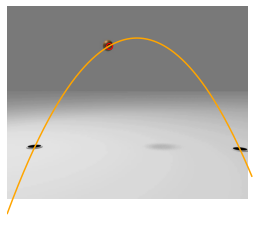

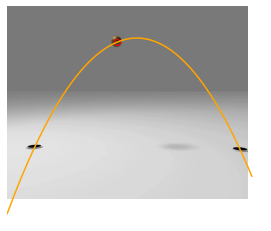

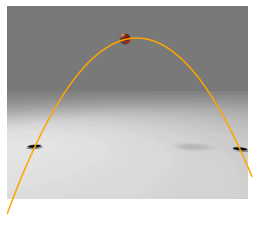

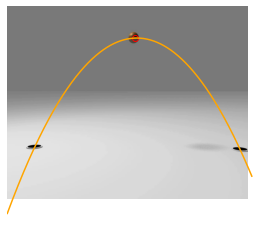

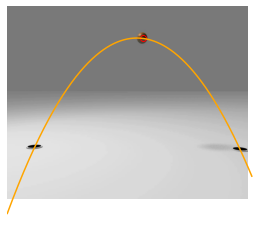

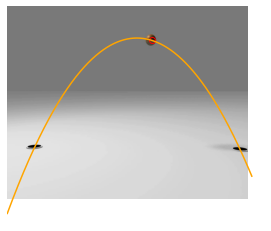

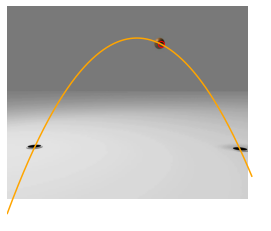

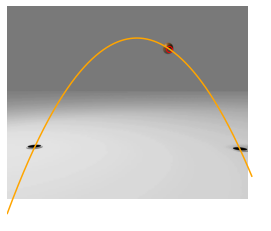

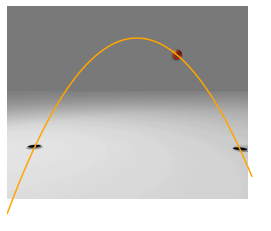

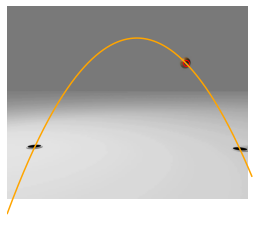

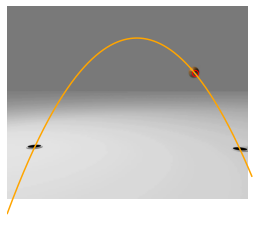

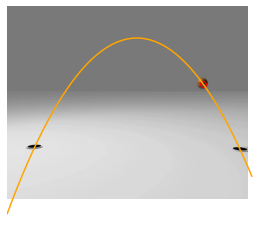

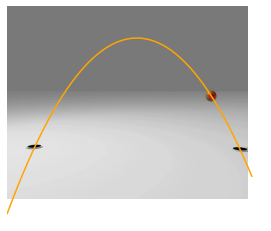

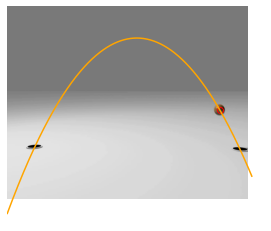

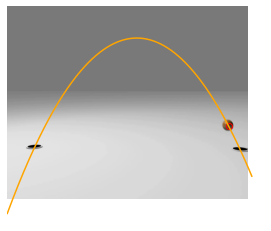

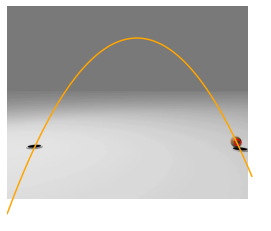

In [9]:
import os
#Modify the .png images with the plot and save them as .jpg files in the same directory
newpath = 'mov/' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(newpath))
for i in range(0,len(numpy_array)):    
    plt.imshow(frames[i]) #take each .jpg image stored in the frames list
    plt.plot(numpy_array[i][0],numpy_array[i][1], 'ro', mfc='none') #plot the coordinates
    plt.axis('off') #no axes displayed
    plt.plot(x_pos, y_pos, linestyle='-', color='orange') # parabola line
    plt.plot(x_pos, y_pos, color='none') # parabola points
    if i<10: #save the plotted images in the same directory
        plt.savefig("movie0"+str(i)+'.jpg') #sorting of filenames from 0-9 by adding a 0 in the front
    else:
        plt.savefig("movie"+str(i)+'.jpg') 
    plt.show() #show the plots below

In [10]:
# Create the frames
animation = []
imgs = sorted(glob("*.jpg")) #take all the .jpg files from the directory into a list of files
for i in imgs:
    new_frame = Image.open(i) #open the .jpg image files
    animation.append(new_frame) #add them to the animation list
 
animation[0].save('../trajectories.gif', format='GIF', #overlay the images on the animation list and save it as gif
               append_images=animation[1:],
               save_all=True,
               duration=300, loop=1) #duration 300 (by default) and show the gif just once with no repetition